# Library

In [624]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Optimized Variable: Battery Size

In [460]:
# array for batery size: 5 to 30 kWh
bat_size = np.linspace(1, 30, 30)

# array for battery weight in kg 
# battery energy density = 0.1 kWh/kg (shiau et al, 2009; Redelbach et al, 2014)
bat_weight = np.linspace(bat_size[0]*10, bat_size[len(bat_size)-1]*10, len(bat_size))


''' we can replace this with a better/updated model'''
# cost of battery capacity in EUR/kWh, year 2010 (Radelbach et al, 2014)
bat_cost1 = np.linspace(370, 330, 5)
bat_cost2 = np.linspace(320, 300, 5)
bat_cost3 = np.linspace(295, 280, 5)
bat_cost4 = np.linspace(278, 270, 15)

# array for cost of battery
bat_cost = np.concatenate([bat_cost1, 
                           bat_cost2, 
                           bat_cost3, 
                           bat_cost4])

# array for battery price in EUR (bat_size * bat_cost)
bat_price = []
for i in range(0, len(bat_size)):
    bat_price.append(bat_size[i] * bat_cost[i])

[Text(0, 0.5, 'Battery Production Cost (EUR/kWh)')]

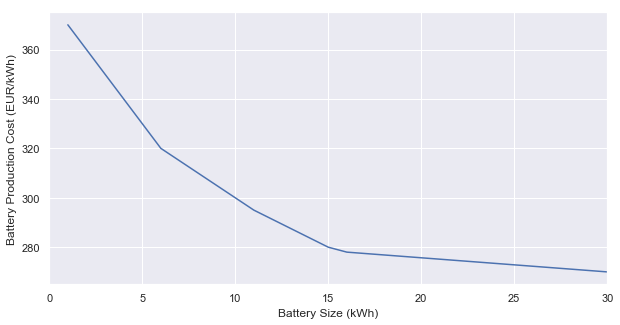

In [593]:
fig, ax= plt.subplots(figsize = (10,5))
sns.lineplot(x =  bat_size, y = bat_cost)
ax.set_xlim(left = 0, right = 30)
#ax.set_ylim(bottom = 0, top = 50)
ax.set(xlabel = 'Battery Size (kWh)')
ax.set(ylabel = 'Battery Production Cost (EUR/kWh)')

# Input Parameters

##### Vehicle Weights

In [568]:
# vehicle weight in kg
veh_weight = 1500

# array for total weight 
tot_weight = np.linspace(bat_weight[0] + veh_weight, 
                         bat_weight[len(bat_weight)-1] + veh_weight,
                         len(bat_weight))

##### Investment Cost

In [571]:
# ========== both ICE & EV 

# cost of the rest of the vehicle
c_vehicle = 11280 # EUR

# cost of powertrain & transmissions
c_transm = 2300 # EUR

# ========== ICE only 

# cost of combustion engine
c_ce = 1360 # EUR

# ========== EV only 

# cost of battery
#c_bat = bat_price[i] # EUR

# cost of electric motor
c_elmotor = 940 # EUR

# cost of power electronics
c_elpower = 1370 # EUR

##### Maintenance Cost

In [572]:
''' we can refine our analysis by including this as a variable'''
# annual cost of maintenance ICE
c_maintenance_ice = 0

# annual cost of maintenance EV
c_maintenance_ev = 0

##### Energy Cost

In [573]:
# ========== ICE

# cost of gasoline
price_fuel = 1.62 # EUR/l, year 2010 (ADAC, 2013)

# average mpg
mpg = 0.05 # l/km 

In [688]:
# ========== EV
''' we should refine this part using the work equation discussed with Prof Moura'''
# cost of electricity
price_charging = 0.27 # EUR/kWh, year 2010 (ADAC, 2013)

# base energy consumption
e_consum0 = 0.162*8 # kWh/km (Radelbach et al, 2014)

# increase energy consump 0.04% at every 1 kg weight increase (Radelbach et al, 2012a)
change = 0.0004 

# array for energy consumption of each total weight
e_consum = []
for i in tot_weight:
    x = e_consum0 + (e_consum0 * change * (i - tot_weight[0]))
    e_consum.append(x)

[Text(0, 0.5, 'Energy Consumption (kWh)')]

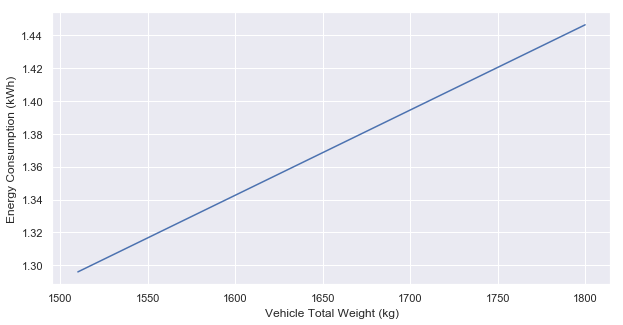

In [689]:
fig, ax= plt.subplots(figsize = (10, 5))
sns.lineplot(x =  tot_weight, y = e_consum)
#ax.set_xlim(left = 0, right = 30)
#ax.set_ylim(bottom = 0, top = 50)
ax.set(xlabel = 'Vehicle Total Weight (kg)')
ax.set(ylabel = 'Energy Consumption (kWh)')

# Methods

In [690]:
def Compute_ICE(dist):
    # preallocate arrays
    ar_energy_cost = []
    ar_TCO = []

    # compute for all battery sizes
    for i in range(0, len(bat_size)):

        # cost of investment (assume resale value at life time = 0)
        C_invest = c_vehicle + c_transm + c_ce 

        # annual cost of maintenace
        C_maintenance = np.linspace(c_maintenance_ice, c_maintenance_ice, t)

        # energy consumption
        c_fuel = dist * mpg * price_fuel
        c_energy = c_fuel 

        # annual cost of energy
        C_energy = np.linspace(c_energy, c_energy, t)

        # TCO calculation
        TCO = (C_invest + (sum(C_maintenance + C_energy))/(1 + interest)**t) / (t * dist) # EUR/km

        # store in arrays
        ar_energy_cost.append(c_energy / dist)
        ar_TCO.append(TCO)
    
    return ar_energy_cost, ar_TCO

In [691]:
def Compute_EV(dist):
    
    # preallocate arrays
    ar_energy_cost = []
    ar_TCO = []

    # compute for all battery sizes
    for i in range(0, len(bat_size)):

        # cost of investment (assume resale value at life time = 0)
        C_invest = c_vehicle + c_transm + (bat_price[i] + c_elmotor + c_elpower)

        # annual cost of maintenace
        C_maintenance = np.linspace(c_maintenance_ev, c_maintenance_ev, t)

        # energy consumption
        c_charging = dist * price_charging * e_consum[i] / bat_size[i]
        c_energy = c_charging

        # annual cost of energy
        C_energy = np.linspace(c_energy, c_energy, t)

        # TCO calculation
        TCO = (C_invest + (sum(C_maintenance + C_energy))/(1 + interest)**t) / (t * dist) # EUR/km

        # store in arrays
        ar_energy_cost.append(c_energy / dist)
        ar_TCO.append(TCO)

    return ar_energy_cost, ar_TCO

# Main Computation

In [692]:
# assumed life time
t = 12 # typical life time TCO calculation (Ozdemir & Hartmann, 2012)
interest = 0.05 # assume interest rate as 5%

In [693]:
# annual distance
dist = [6000, 8000, 10000] # km

cost_energy_ev = []
TCO_ev = []
TCO_ice = []

for km in dist:
    cost_energy_ev.append(Compute_EV(km)[0])
    TCO_ev.append(Compute_EV(km)[1])
    TCO_ice.append(Compute_ICE(km)[1])

TCO_ev =pd.DataFrame(np.transpose(TCO_ev), columns = dist).set_index(bat_size)
TCO_ice =pd.DataFrame(np.transpose(TCO_ice), columns = dist).set_index(bat_size)

# Plots

[Text(0, 0.5, 'Energy Cost (EUR/km)')]

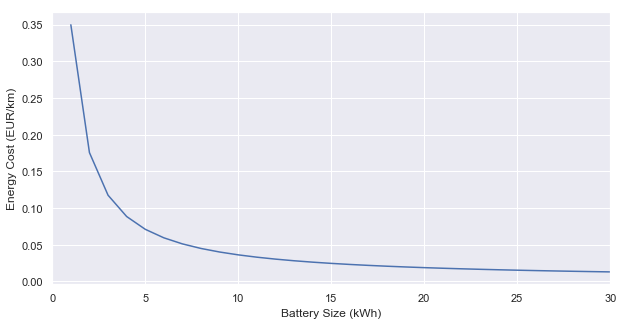

In [694]:
fig, ax= plt.subplots(figsize = (10, 5))
sns.lineplot(x = bat_size, y = cost_energy_ev[0])
ax.set_xlim(left = 0, right = 30)
#ax.set_ylim(bottom = 0, top = 50)
ax.set(xlabel = 'Battery Size (kWh)')
ax.set(ylabel = 'Energy Cost (EUR/km)')

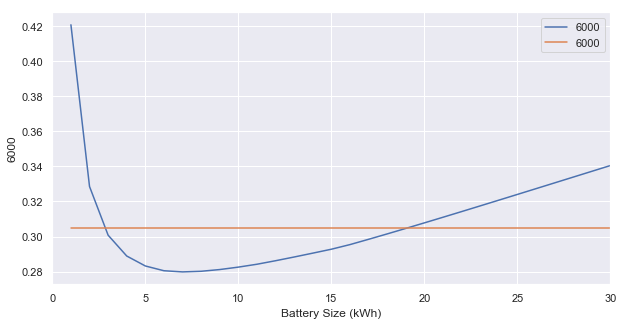

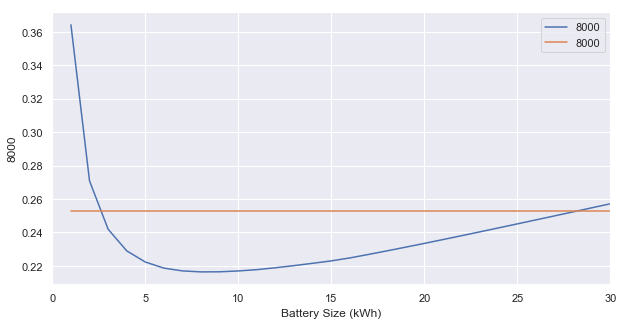

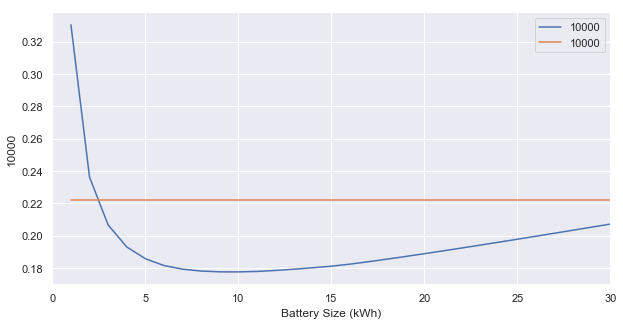

In [702]:
for km in dist:
    fig, ax= plt.subplots(figsize = (10, 5))
    ax.set_xlim(left = 0, right = 30)
    #ax.set_ylim(bottom = 0, top = 50)
    ax.set(xlabel = 'Battery Size (kWh)')
    ax.set(ylabel = 'TCO (EUR/km)')

    sns.lineplot(x = bat_size, y = TCO_ev[km], label=km)
    sns.lineplot(x = bat_size, y = TCO_ice[km], label=km)